In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest

In [3]:
cleavland = pd.read_csv('DSBDALExam DataSets/HeartDisease/Cleavland.csv', header=None)
hungarian = pd.read_csv('DSBDALExam DataSets/HeartDisease/hung.csv', header=None)
switzerland = pd.read_csv('DSBDALExam DataSets/HeartDisease/Switzerland.csv', header=None)

In [4]:
combined = pd.concat([cleavland, hungarian, switzerland])

In [5]:
combined.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                   'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [6]:
combined

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115,0,0,1,92,1,0,2,?,7,1
119,70.0,1.0,4.0,140,0,1,0,157,1,2,2,?,7,3
120,72.0,1.0,3.0,160,0,?,2,114,0,1.6,2,2,?,0
121,73.0,0.0,3.0,160,0,0,1,121,0,0,1,?,3,1


In [7]:
combined.shape

(720, 14)

<br>

# Data Cleaning

In [8]:
combined.replace('?', pd.NA, inplace=True)
combined.dropna(inplace=True)
combined = combined.apply(pd.to_numeric)
combined = combined[(combined>=0).all(1)]

In [9]:
combined

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [10]:
combined.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [11]:
np.random.seed(42)
mask = np.random.rand(*combined.shape) < 0.5
combined[mask] = np.nan

In [12]:
combined.isna().sum()

age         148
sex         147
cp          153
trestbps    159
chol        123
fbs         153
restecg     163
thalach     139
exang       147
oldpeak     141
slope       149
ca          154
thal        154
num         151
dtype: int64

In [13]:
combined.fillna(combined.mode().iloc[0], inplace=True)

In [14]:
combined.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [15]:
combined.isna().sum().sum()

0

# Error Correcting / Outlier Removal

In [16]:
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(combined.drop('num', axis=1))
combined = combined[outliers == 1]

In [17]:
combined

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,58.0,1.0,1.0,145.0,197.0,0.0,0.0,150.0,0.0,2.3,2.0,0.0,6.0,0.0
1,58.0,1.0,4.0,160.0,197.0,0.0,2.0,160.0,0.0,0.0,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,197.0,0.0,2.0,129.0,0.0,0.0,2.0,0.0,3.0,0.0
3,58.0,1.0,4.0,130.0,197.0,0.0,0.0,160.0,0.0,3.5,3.0,0.0,3.0,0.0
4,58.0,1.0,4.0,120.0,197.0,0.0,2.0,160.0,0.0,1.4,2.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,1.0,4.0,120.0,197.0,0.0,0.0,160.0,0.0,0.0,2.0,0.0,7.0,0.0
298,45.0,1.0,4.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,0.0
300,58.0,1.0,4.0,130.0,131.0,0.0,0.0,160.0,1.0,1.2,2.0,0.0,3.0,3.0
301,57.0,0.0,4.0,120.0,236.0,0.0,0.0,160.0,0.0,0.0,2.0,0.0,3.0,1.0


# Data Transformation

In [18]:
X = combined.drop('num', axis=1)
y = combined['num']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [21]:
# Predict using logistic regression
y_pred_logreg = pipeline.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [24]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cr_logreg = classification_report(y_test, y_pred_logreg, zero_division=1)

In [25]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn, zero_division=1)

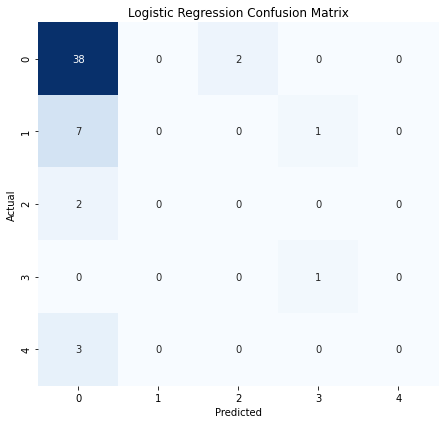

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

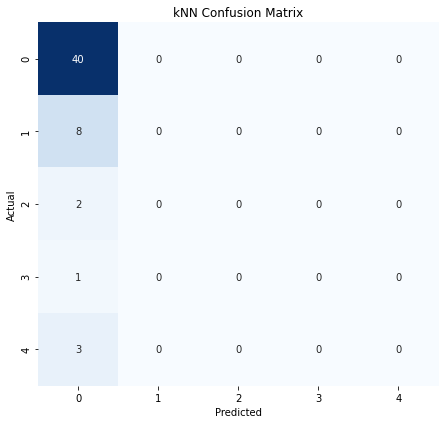

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('kNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [28]:
print('Logistic Regression Classification Report: ')
print(cr_logreg)

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84        40
         1.0       1.00      0.00      0.00         8
         2.0       0.00      0.00      1.00         2
         3.0       0.50      1.00      0.67         1
         4.0       1.00      0.00      0.00         3

    accuracy                           0.72        54
   macro avg       0.65      0.39      0.50        54
weighted avg       0.78      0.72      0.67        54



In [29]:
print('kNN Classification Report: ')
print(cr_knn)

kNN Classification Report: 
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        40
         1.0       1.00      0.00      0.00         8
         2.0       1.00      0.00      0.00         2
         3.0       1.00      0.00      0.00         1
         4.0       1.00      0.00      0.00         3

    accuracy                           0.74        54
   macro avg       0.95      0.20      0.17        54
weighted avg       0.81      0.74      0.63        54



In [34]:
print('Logistic Regression Accuracy Score: ')
print(accuracy_logreg*100)

Logistic Regression Accuracy Score: 
72.22222222222221


In [31]:
print('kNN Classification Accuracy Score: ')
print(accuracy_knn*100)

kNN Classification Accuracy Score: 
74.07407407407408


<Figure size 864x576 with 0 Axes>

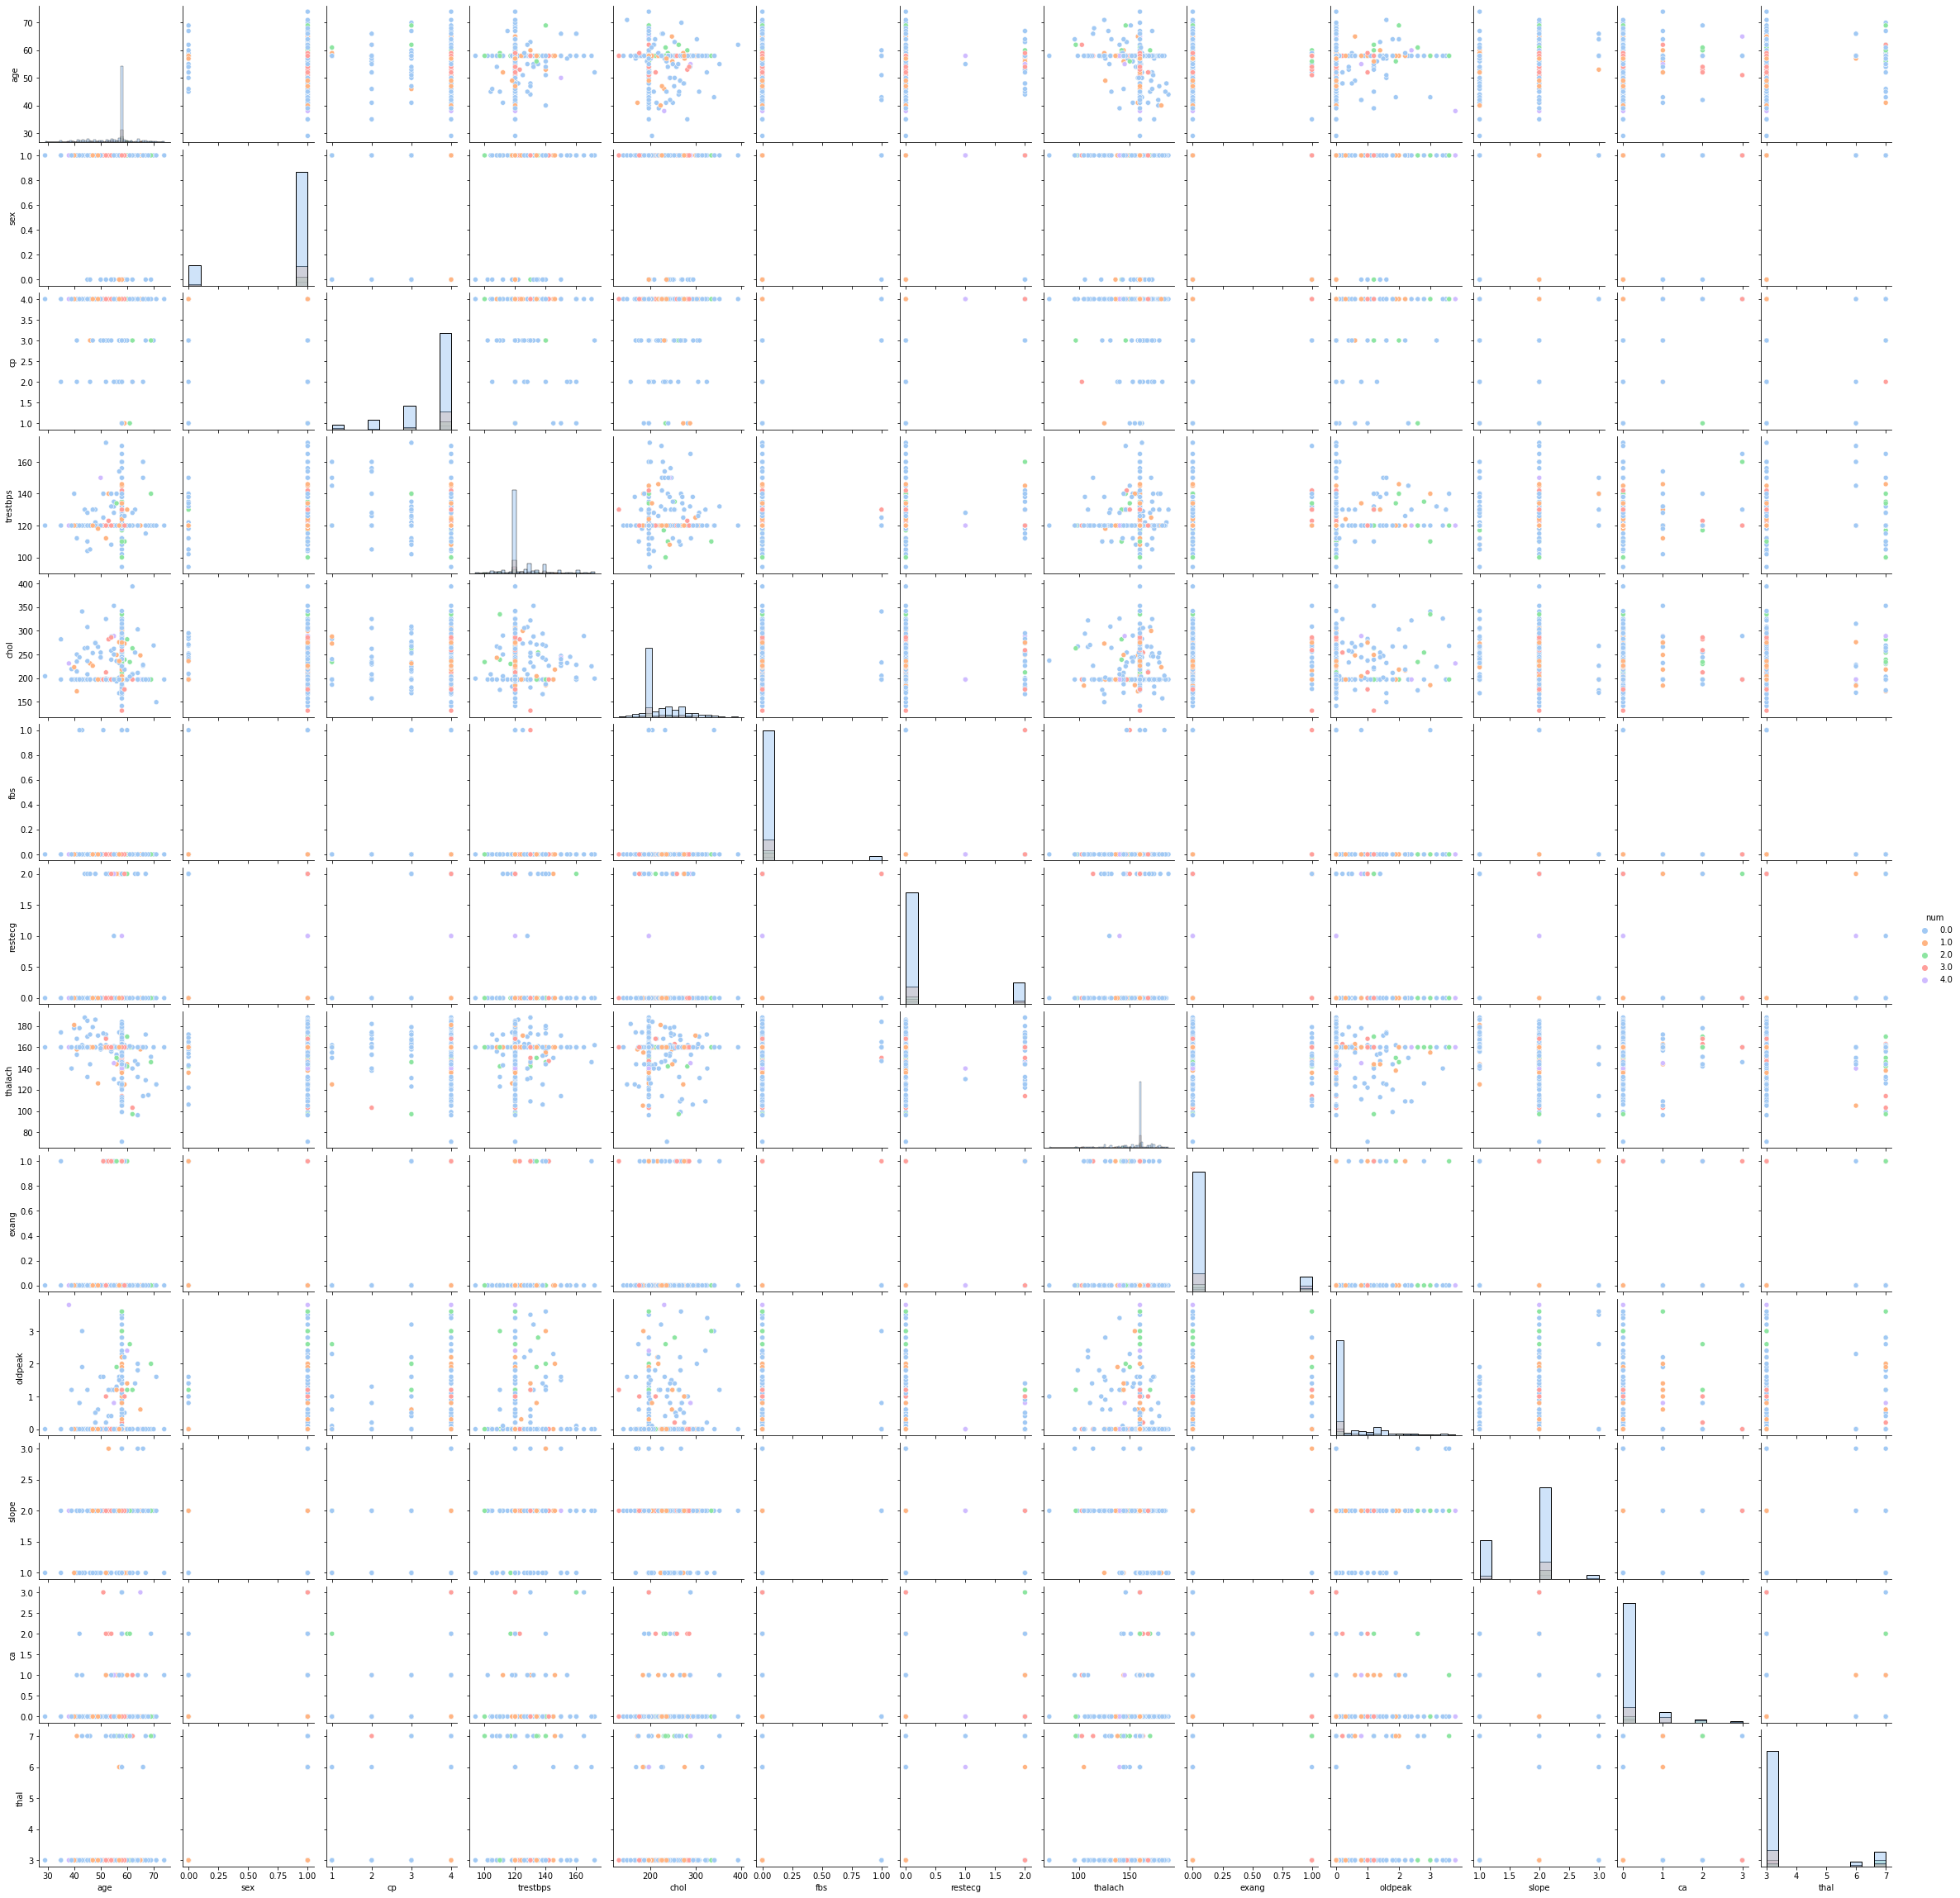

In [32]:
plt.figure(figsize=(12,8))
sns.pairplot(combined, hue='num', diag_kind='hist', palette='pastel')
plt.show()

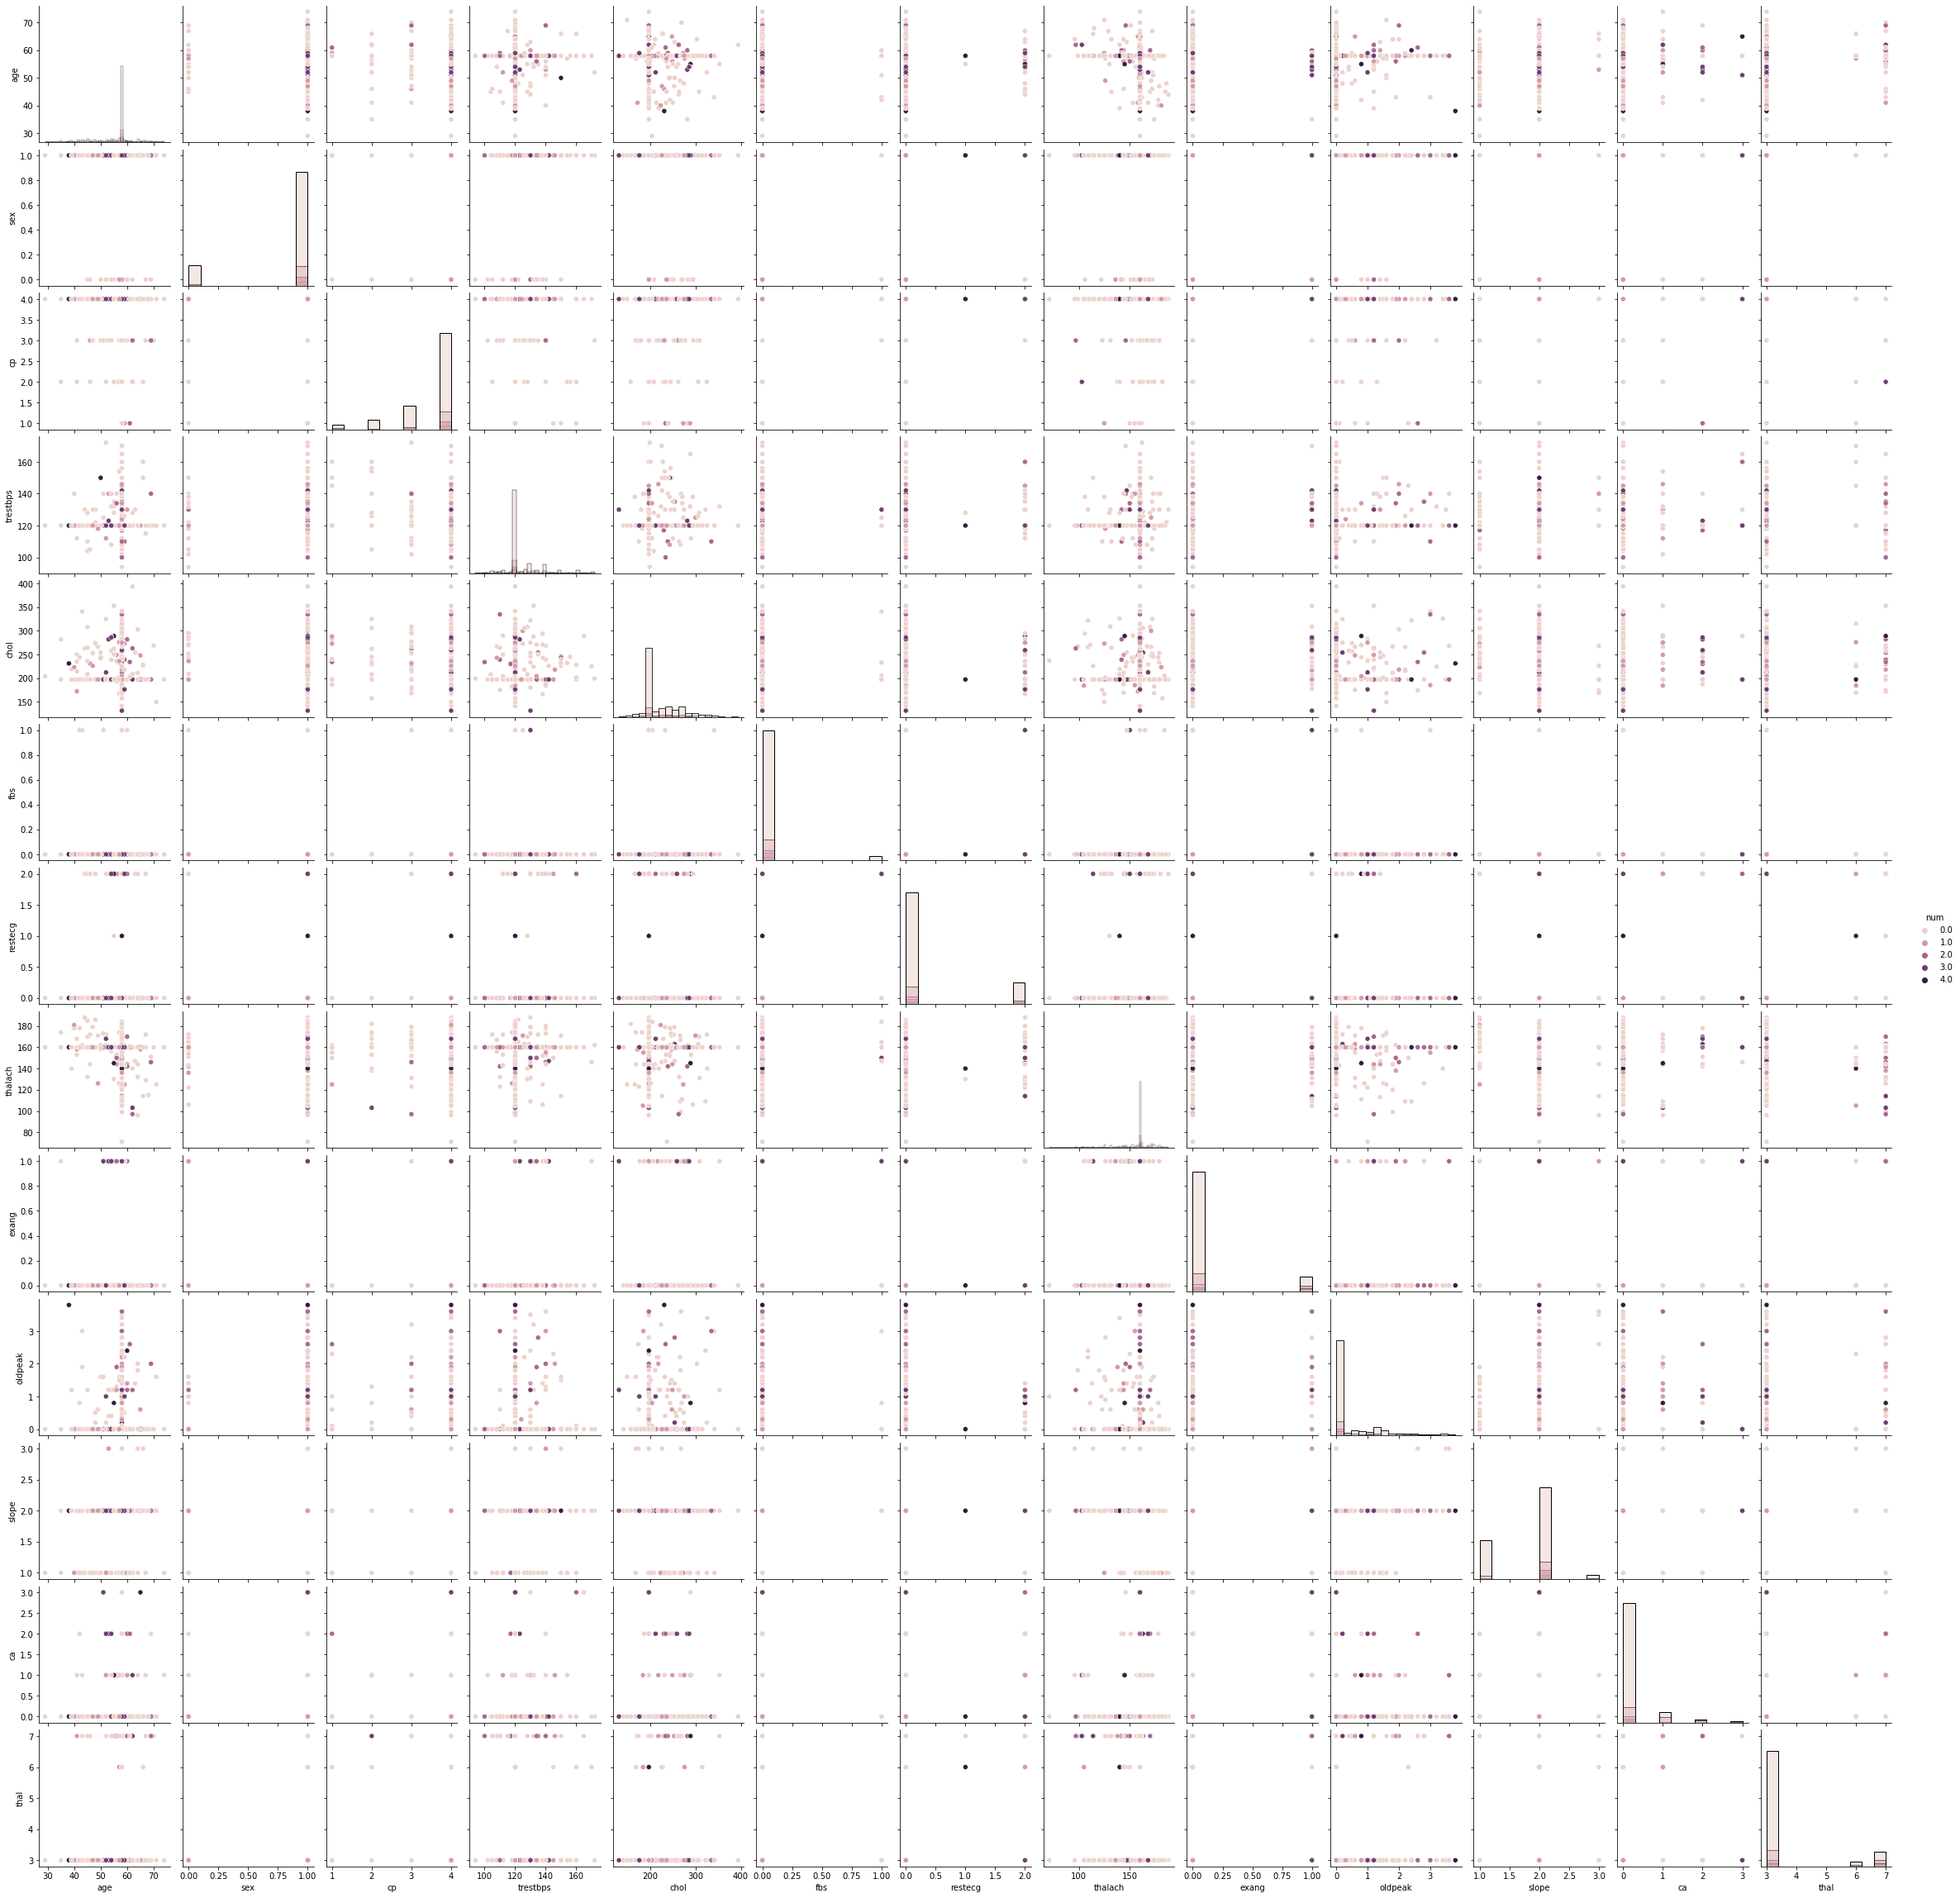

In [33]:
sns.pairplot(combined, hue='num', diag_kind='hist')
plt.show()